# VISUALIZATION - PHÂN CỤM DỮ LIỆU BIỂU HIỆN GEN

**Đồ án:** Phân cụm dữ liệu biểu hiện gen với ensemble learning  
**Phần:** Visualization (EDA + PCA + t-SNE)  
**Dữ liệu:**
- `data.csv`: Raw RNA-Seq (801 samples × 20,531 genes)
- `data_pca30.csv`: Dữ liệu sau StandardScaler + PCA (30 components)
- `labels.csv`: Nhãn sinh học (chỉ dùng cho visualization)

## Bước 1: Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bước 2: Cài đặt thư viện cần thiết

In [2]:
%%capture
!pip install scikit-learn numpy pandas matplotlib seaborn

## Bước 3: Import thư viện

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

print("✅ Import thư viện thành công!")

✅ Import thư viện thành công!


## Bước 4: Thiết lập màu sắc cho visualization

In [4]:
# Màu sắc tùy chỉnh cho 5 class
custom_colors = ['green', 'orange', 'yellow', 'blue', 'red']
cmap = ListedColormap(custom_colors)
bounds = np.arange(len(custom_colors) + 1) - 0.5
norm = BoundaryNorm(bounds, cmap.N)

print("✅ Thiết lập màu sắc thành công!")

✅ Thiết lập màu sắc thành công!


## Bước 5: Đọc dữ liệu từ Google Drive

In [5]:
# Đường dẫn Google Drive
DATA_PATH = '/content/drive/MyDrive/Project_ML/'

# Đọc dữ liệu raw
df_raw = pd.read_csv(DATA_PATH + 'data.csv', index_col=0)

# Đọc dữ liệu PCA30 (đã được xử lý sẵn)
df_pca30 = pd.read_csv(DATA_PATH + 'data_pca30.csv', index_col=0)

# Đọc nhãn
labels = pd.read_csv(DATA_PATH + 'labels.csv', index_col=0, header=None, names=['class'])['class']
labels = labels.reindex(df_raw.index)

print("✅ Đọc dữ liệu thành công!")
print(f"   Raw data: {df_raw.shape}")
print(f"   PCA30 data: {df_pca30.shape}")
print(f"   Labels: {labels.shape}")

✅ Đọc dữ liệu thành công!
   Raw data: (801, 20531)
   PCA30 data: (801, 30)
   Labels: (801,)


## Bước 6: Xem trước dữ liệu raw

In [6]:
df_raw.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


## Bước 7: Xem trước dữ liệu PCA30

In [7]:
df_pca30.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
sample_0,-62.755415,94.071973,-89.519831,15.942567,81.423539,13.998292,-7.716073,-22.936553,-32.837894,2.202674,...,-4.475545,-3.029676,2.709447,4.302853,-4.770536,-0.203443,8.329175,-7.914947,7.908808,-3.101426
sample_1,-2.432896,-90.585842,1.067308,53.083120,-15.676684,-60.842472,-10.257369,-48.822967,14.257394,12.214426,...,8.492298,15.650593,-6.029908,-14.692740,1.281445,-5.462365,-1.207971,15.255051,-14.227726,-15.937022
sample_2,-71.266853,8.064608,-66.112455,-81.381475,-7.525685,-109.824273,-5.519407,-13.364488,38.415728,5.124863,...,-8.624846,17.298466,-37.612318,0.946915,9.058741,8.124563,17.144118,-1.874028,17.371869,-19.801998
sample_3,-84.770785,73.244566,-74.181000,-27.022697,-18.044895,-50.116433,3.495197,-11.318519,8.319659,3.149473,...,10.822188,-4.074585,4.732978,7.278880,-7.756505,15.070796,13.979274,6.779393,7.712459,-18.236012
sample_4,-69.560171,9.612940,67.497549,-34.868543,-1.795849,6.676780,2.840782,16.780153,-49.319754,-10.508581,...,6.769583,13.269567,3.717152,-0.379190,12.514806,-5.438219,9.420027,14.290547,-19.028461,-10.073974


## Bước 8: Xem phân bố nhãn

In [8]:
print("Phân bố các class:")
print(labels.value_counts())
print(f"\nTổng số class: {labels.nunique()}")

Phân bố các class:
class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

Tổng số class: 5


## Bước 9: Mã hóa nhãn (Label Encoding)

In [9]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

print("Mapping nhãn:")
for i, class_name in enumerate(le.classes_):
    print(f"  {i} → {class_name}")

Mapping nhãn:
  0 → BRCA
  1 → COAD
  2 → KIRC
  3 → LUAD
  4 → PRAD


---
# PHẦN 1 – EDA TRÊN DỮ LIỆU GỐC (RAW DATA)

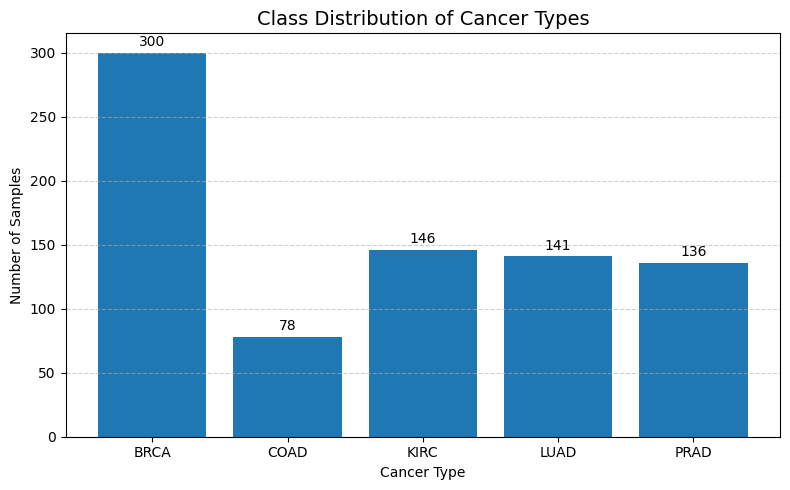

In [10]:
class_counts = labels.value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(class_counts.index, class_counts.values)

plt.title("Class Distribution of Cancer Types", fontsize=14)
plt.xlabel("Cancer Type")
plt.ylabel("Number of Samples")

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 5,
        int(bar.get_height()),
        ha='center',
        fontsize=10
    )

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## 📊 Biểu đồ 1: Heatmap - Partial View of Gene Expression

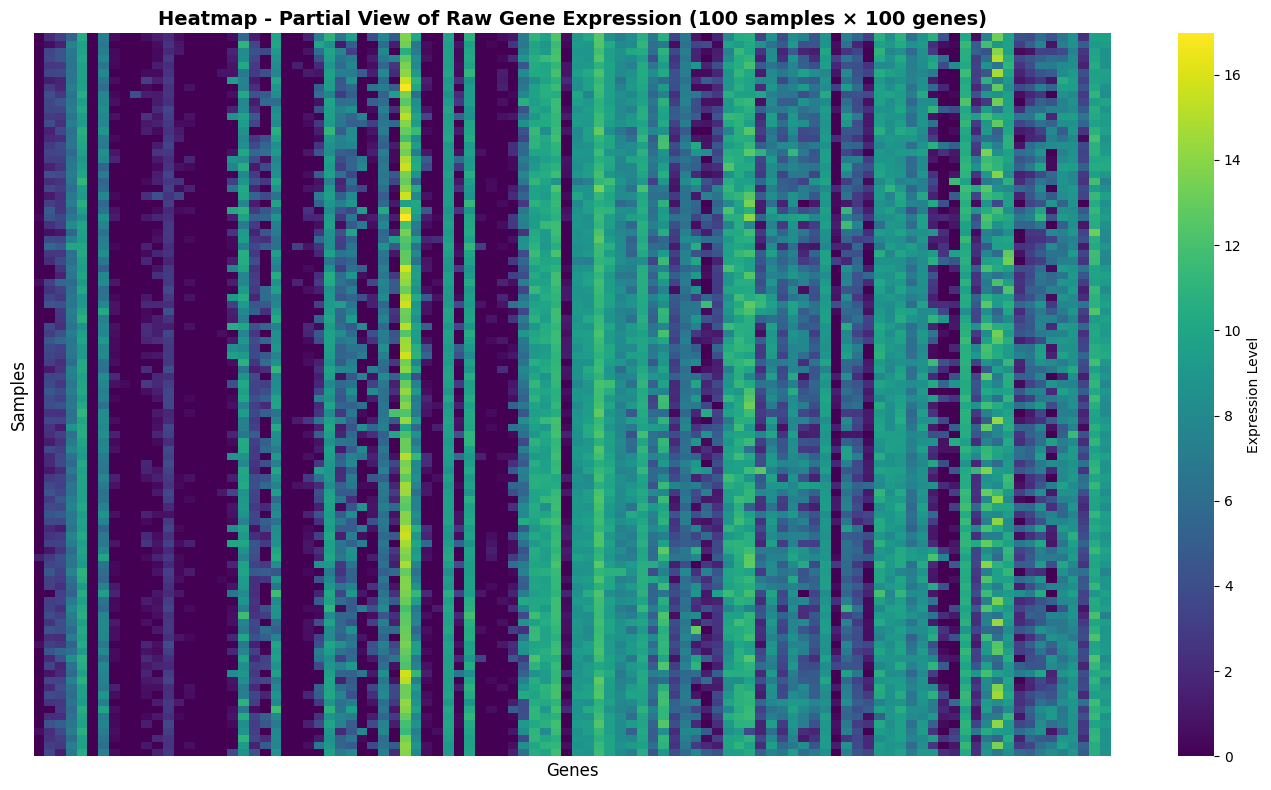

In [11]:
# Vẽ heatmap cho 100 samples × 100 genes
plt.figure(figsize=(14, 8))
sns.heatmap(df_raw.iloc[:100, :100],
            cmap='viridis',
            xticklabels=False,
            yticklabels=False,
            cbar_kws={'label': 'Expression Level'})
plt.title('Heatmap - Partial View of Raw Gene Expression (100 samples × 100 genes)',
          fontsize=14, fontweight='bold')
plt.xlabel('Genes', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.tight_layout()
plt.show()

## 📊 Biểu đồ 2: Distribution of Mean Gene Expression

### Bước 2.1: Tính mean expression cho mỗi gene

In [12]:
# Tính mean expression cho từng gene (trung bình trên tất cả samples)
mean_gene_expr = df_raw.mean(axis=0)

print(f"Tổng số genes: {len(mean_gene_expr)}")
print(f"Khoảng giá trị: [{mean_gene_expr.min():.2f}, {mean_gene_expr.max():.2f}]")
print(f"Mean: {mean_gene_expr.mean():.2f}")
print(f"Median: {mean_gene_expr.median():.2f}")

Tổng số genes: 20531
Khoảng giá trị: [0.00, 16.43]
Mean: 6.44
Median: 7.52


### Bước 2.2: Vẽ biểu đồ phân bố (Histogram + Boxplot)

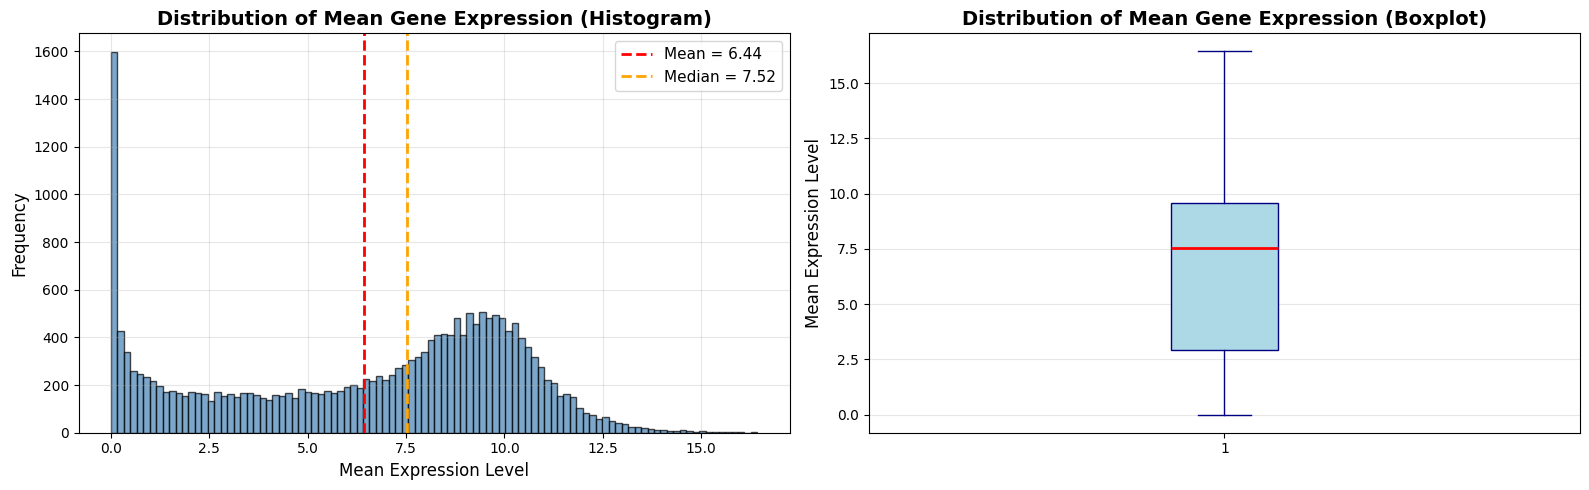

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Subplot 1: Histogram
axes[0].hist(mean_gene_expr, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(mean_gene_expr.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean = {mean_gene_expr.mean():.2f}')
axes[0].axvline(mean_gene_expr.median(), color='orange', linestyle='--', linewidth=2,
                label=f'Median = {mean_gene_expr.median():.2f}')
axes[0].set_title('Distribution of Mean Gene Expression (Histogram)',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mean Expression Level', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Subplot 2: Boxplot
axes[1].boxplot(mean_gene_expr, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='navy'),
                whiskerprops=dict(color='navy'),
                capprops=dict(color='navy'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Distribution of Mean Gene Expression (Boxplot)',
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('Mean Expression Level', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

---
# PHẦN 2 – VISUALIZATION SAU PCA

Biểu đồ 3: Cumulative Explained Variance (PCA)

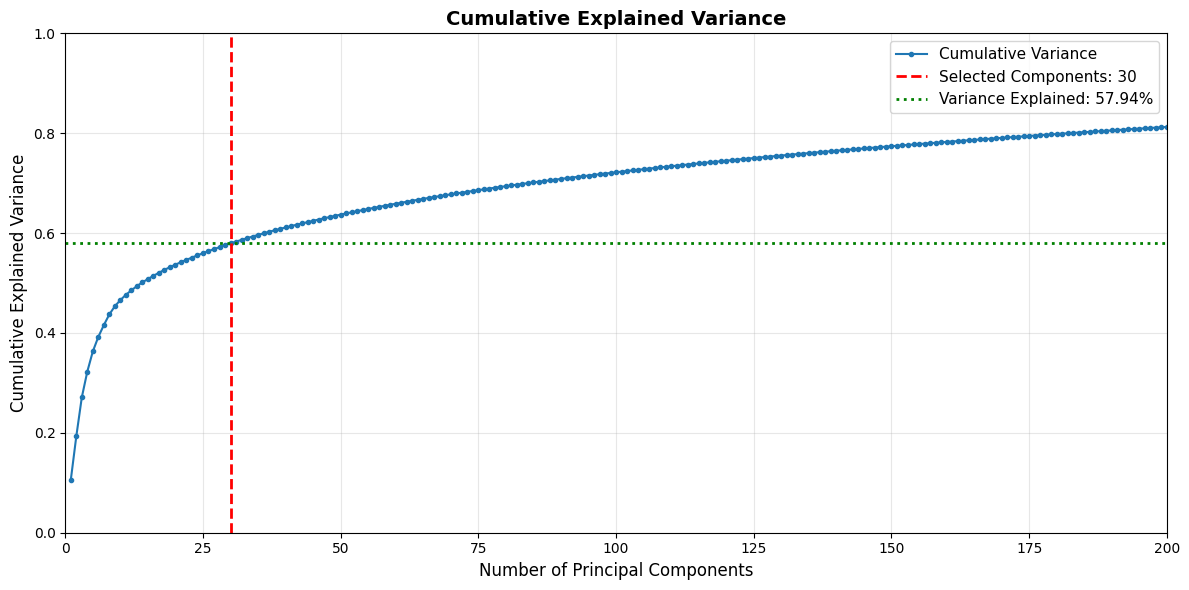

✅ Kết luận: Tại 30 chiều, giữ lại 57.94% thông tin.


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_raw)

pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

K_CUTOFF = 30
variance_at_k = cumulative_variance[K_CUTOFF - 1]

plt.figure(figsize=(12, 6))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         marker='.', linestyle='-', color='tab:blue', label='Cumulative Variance')

plt.axvline(x=K_CUTOFF, color='red', linestyle='--', linewidth=2,
            label=f'Selected Components: {K_CUTOFF}')

plt.axhline(y=variance_at_k, color='green', linestyle=':', linewidth=2,
            label=f'Variance Explained: {variance_at_k:.2%}')

plt.title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.xlim(0, 200)
plt.ylim(0, 1.0)

plt.tight_layout()
plt.show()

print(f"✅ Kết luận: Tại {K_CUTOFF} chiều, giữ lại {variance_at_k:.2%} thông tin.")

## 📊 Biểu đồ 3: PCA Visualization (2D & 3D)

### Bước 3.1: Chuẩn bị dữ liệu PCA

In [15]:
# Chuyển dữ liệu PCA30 sang numpy array
X_pca30 = df_pca30.values

print(f"✅ Dữ liệu PCA30: {X_pca30.shape}")
print(f"   30 components đã giảm từ {df_raw.shape[1]} genes")

✅ Dữ liệu PCA30: (801, 30)
   30 components đã giảm từ 20531 genes


### Bước 3.2: Vẽ PCA 2D & 3D

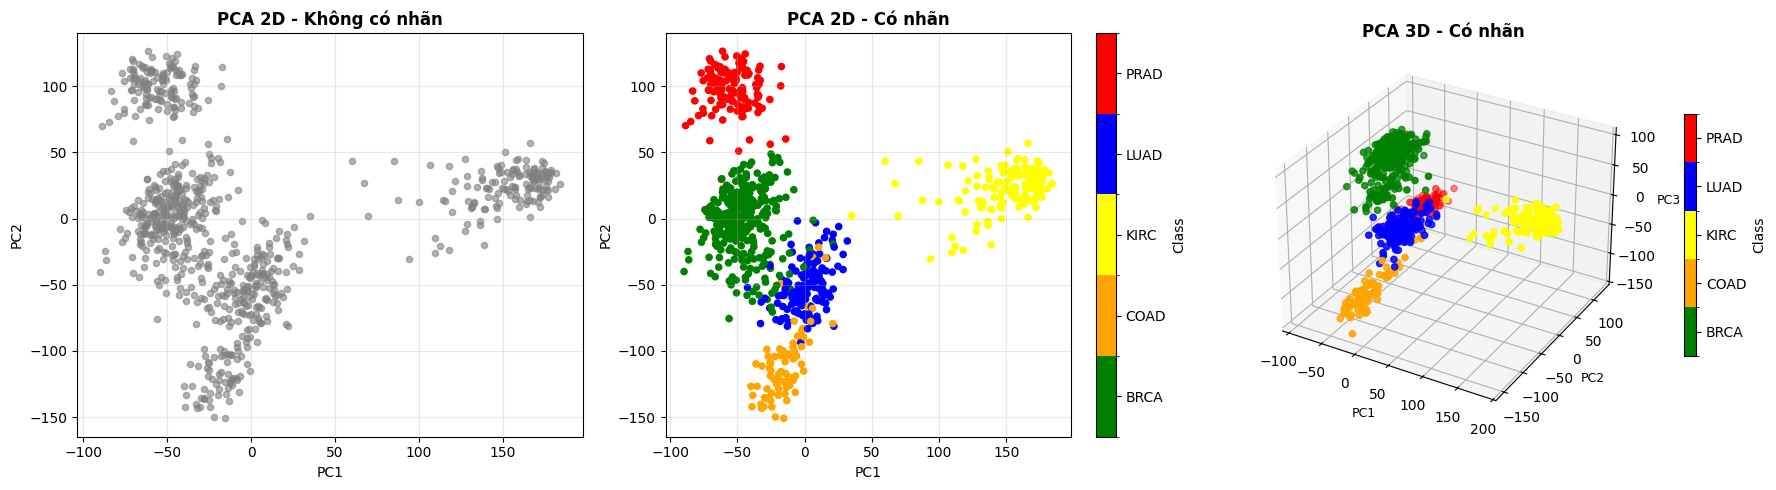

In [16]:
fig = plt.figure(figsize=(18, 5))

# 1. PCA 2D - Không có nhãn
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(X_pca30[:, 0], X_pca30[:, 1], color='gray', alpha=0.6, s=20)
ax1.set_title('PCA 2D - Không có nhãn', fontsize=12, fontweight='bold')
ax1.set_xlabel('PC1', fontsize=10)
ax1.set_ylabel('PC2', fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. PCA 2D - Có nhãn
ax2 = fig.add_subplot(1, 3, 2)
sc2 = ax2.scatter(X_pca30[:, 0], X_pca30[:, 1], c=labels_encoded,
                  cmap=cmap, norm=norm, s=20)
ax2.set_title('PCA 2D - Có nhãn', fontsize=12, fontweight='bold')
ax2.set_xlabel('PC1', fontsize=10)
ax2.set_ylabel('PC2', fontsize=10)
ax2.grid(True, alpha=0.3)
cbar2 = fig.colorbar(sc2, ax=ax2, ticks=np.arange(5))
cbar2.set_label('Class', fontsize=10)
cbar2.ax.set_yticklabels(le.classes_)

# 3. PCA 3D - Có nhãn
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
sc3 = ax3.scatter(X_pca30[:, 0], X_pca30[:, 1], X_pca30[:, 2],
                  c=labels_encoded, cmap=cmap, norm=norm, s=20)
ax3.set_title('PCA 3D - Có nhãn', fontsize=12, fontweight='bold')
ax3.set_xlabel('PC1', fontsize=9)
ax3.set_ylabel('PC2', fontsize=9)
ax3.set_zlabel('PC3', fontsize=9)
cbar3 = fig.colorbar(sc3, ax=ax3, ticks=np.arange(5), shrink=0.6, pad=0.1)
cbar3.set_label('Class', fontsize=10)
cbar3.ax.set_yticklabels(le.classes_)

plt.tight_layout()
plt.show()

## 📊 Biểu đồ 4: t-SNE Visualization (2D & 3D)

### Bước 4.1: Áp dụng t-SNE (có thể mất vài phút)

In [17]:
print("Đang chạy t-SNE (có thể mất vài phút)...\n")

# t-SNE 2D
tsne_2d = TSNE(n_components=2, n_iter=1000, random_state=2025, verbose=1)
X_tsne_2d = tsne_2d.fit_transform(X_pca30)
print("\n✅ t-SNE 2D hoàn thành!")

# t-SNE 3D
tsne_3d = TSNE(n_components=3, n_iter=1000, random_state=2025, verbose=1)
X_tsne_3d = tsne_3d.fit_transform(X_pca30)
print("\n✅ t-SNE 3D hoàn thành!")

Đang chạy t-SNE (có thể mất vài phút)...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.003s...
[t-SNE] Computed neighbors for 801 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 43.045626
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.090164
[t-SNE] KL divergence after 1000 iterations: 0.585892

✅ t-SNE 2D hoàn thành!
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.001s...
[t-SNE] Computed neighbors for 801 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 43.045626
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.888893
[t-SNE] KL divergence after 1000 iterations: 0.481107

✅ t-SNE 3D hoàn thành!


### Bước 4.2: Vẽ t-SNE 2D & 3D

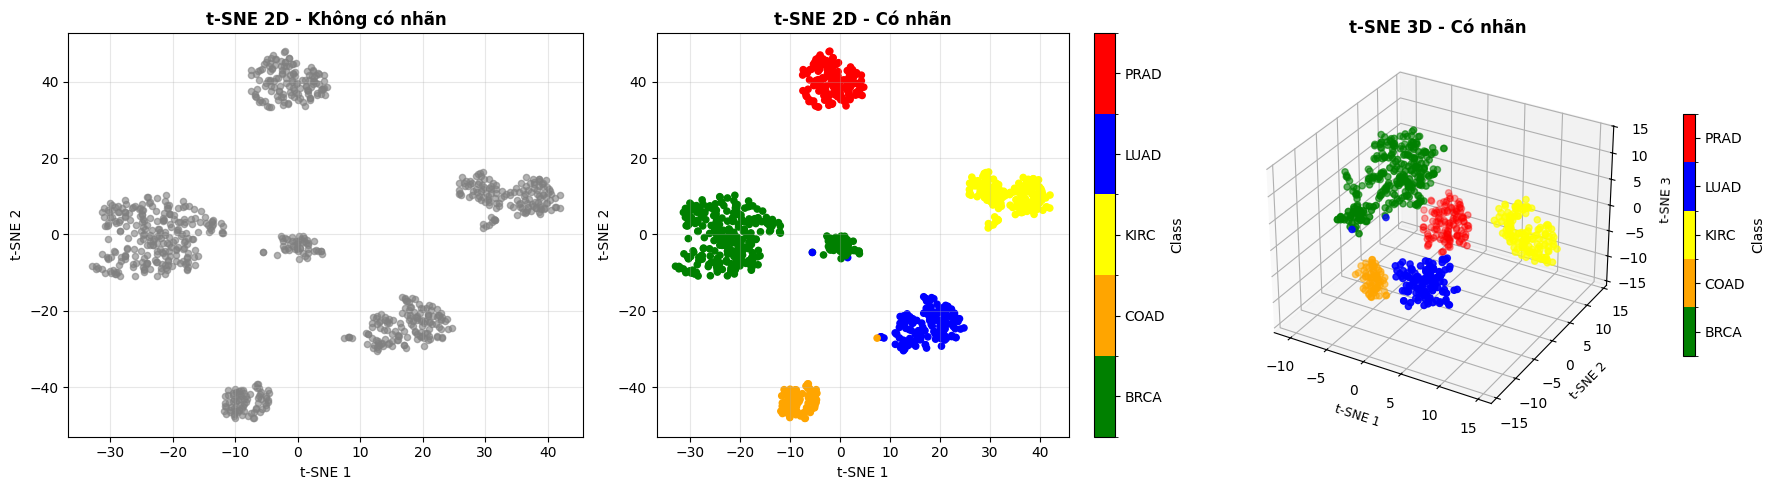

In [18]:
fig = plt.figure(figsize=(18, 5))

# 1. t-SNE 2D - Không có nhãn
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], color='gray', alpha=0.6, s=20)
ax1.set_title('t-SNE 2D - Không có nhãn', fontsize=12, fontweight='bold')
ax1.set_xlabel('t-SNE 1', fontsize=10)
ax1.set_ylabel('t-SNE 2', fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. t-SNE 2D - Có nhãn
ax2 = fig.add_subplot(1, 3, 2)
sc2 = ax2.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=labels_encoded,
                  cmap=cmap, norm=norm, s=20)
ax2.set_title('t-SNE 2D - Có nhãn', fontsize=12, fontweight='bold')
ax2.set_xlabel('t-SNE 1', fontsize=10)
ax2.set_ylabel('t-SNE 2', fontsize=10)
ax2.grid(True, alpha=0.3)
cbar2 = fig.colorbar(sc2, ax=ax2, ticks=np.arange(5))
cbar2.set_label('Class', fontsize=10)
cbar2.ax.set_yticklabels(le.classes_)

# 3. t-SNE 3D - Có nhãn
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
sc3 = ax3.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
                  c=labels_encoded, cmap=cmap, norm=norm, s=20)
ax3.set_title('t-SNE 3D - Có nhãn', fontsize=12, fontweight='bold')
ax3.set_xlabel('t-SNE 1', fontsize=9)
ax3.set_ylabel('t-SNE 2', fontsize=9)
ax3.set_zlabel('t-SNE 3', fontsize=9)
cbar3 = fig.colorbar(sc3, ax=ax3, ticks=np.arange(5), shrink=0.6, pad=0.1)
cbar3.set_label('Class', fontsize=10)
cbar3.ax.set_yticklabels(le.classes_)

plt.tight_layout()
plt.show()